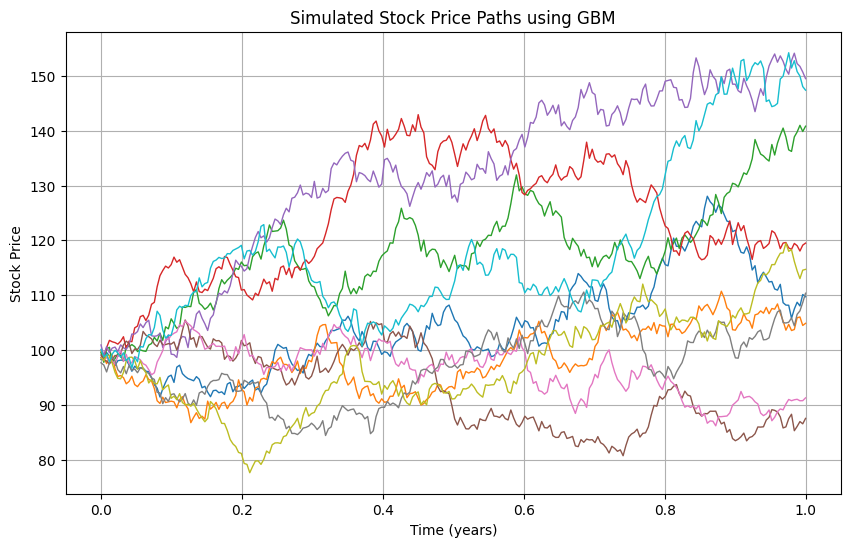

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Parameters for the GBM simulation
S0 = 100        # Initial stock price
mu = 0.1        # Drift (10% annual return)
sigma = 0.2     # Volatility (20% annual std dev)
T = 1           # Time horizon in years
N = 252         # Number of time steps (trading days)
n_paths = 10    # Number of simulated paths

# Time step size
dt = T / N

# Generate random normal values for Brownian motion
Z = np.random.normal(size=(N, n_paths))
W = np.cumsum(np.sqrt(dt) * Z, axis=0)  # Brownian paths

# Compute GBM paths
time_grid = np.linspace(0, T, N)
S = S0 * np.exp((mu - 0.5 * sigma**2) * time_grid[:, None] + sigma * W)

# Plot simulated paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time_grid, S[:, i], lw=1)
plt.title("Simulated Stock Price Paths using GBM")
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

# Prepare data for user inspection



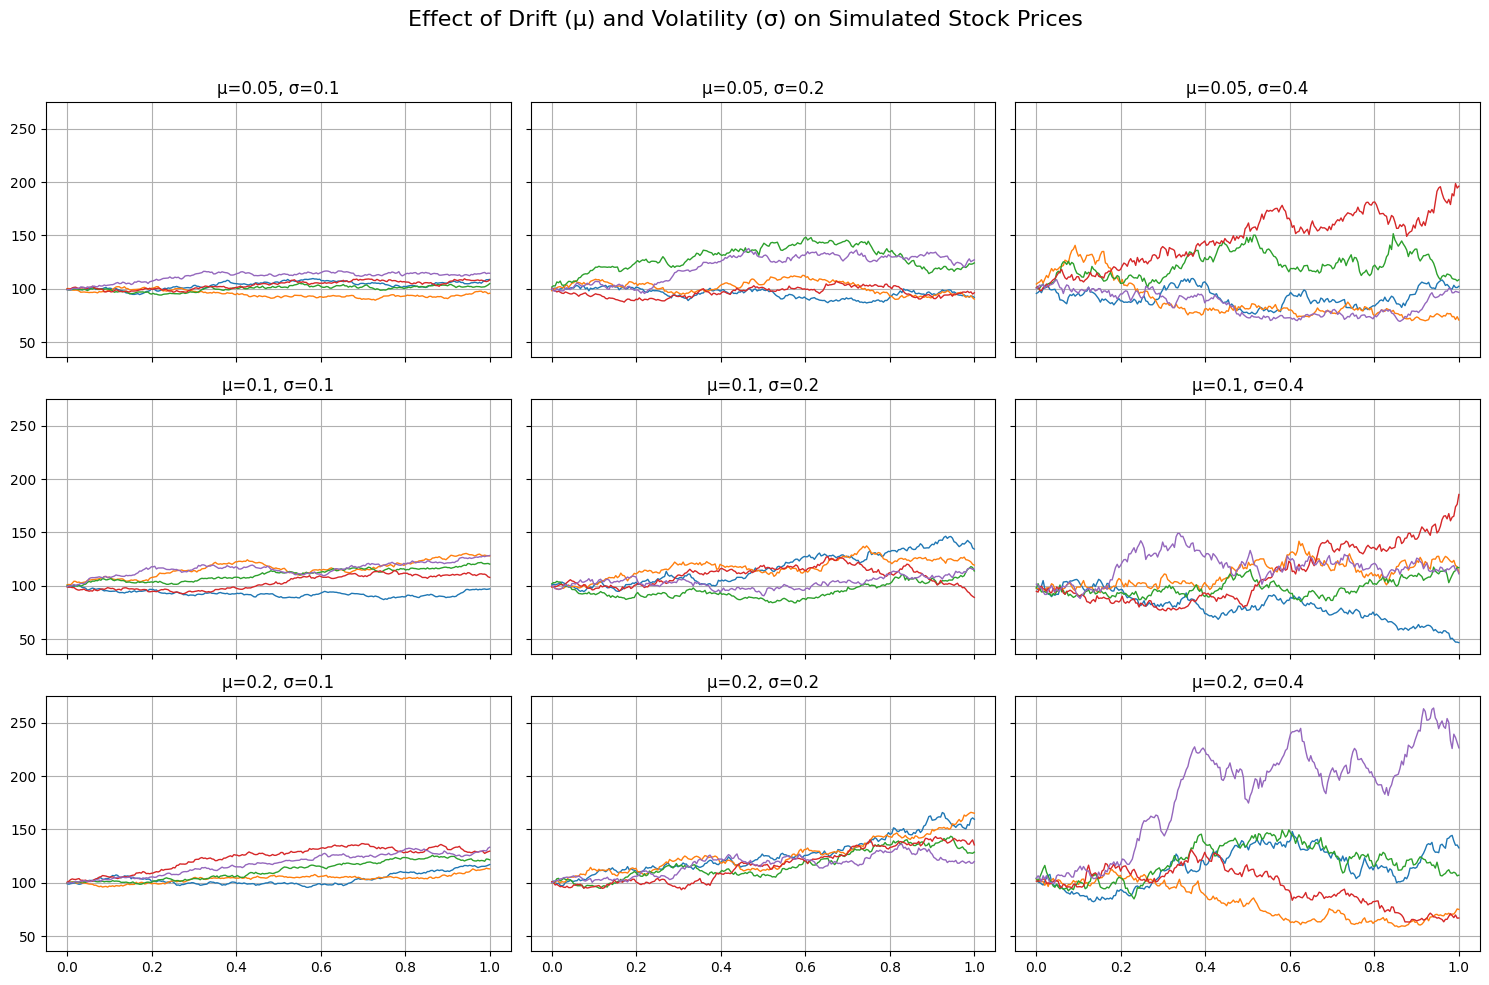

     mu  sigma  expected_return  risk (std dev)
0  0.05    0.1         0.042687        0.101767
1  0.05    0.2         0.045781        0.200807
2  0.05    0.4         0.100749        0.428192
3  0.10    0.1         0.090288        0.108520
4  0.10    0.2         0.124560        0.223432
5  0.10    0.4         0.159166        0.496792
6  0.20    0.1         0.222913        0.127741
7  0.20    0.2         0.245068        0.270558
8  0.20    0.4         0.247212        0.501882


In [3]:
# Parameter combinations for exploration
mu_values = [0.05, 0.1, 0.2]
sigma_values = [0.1, 0.2, 0.4]
n_paths_exploration = 100

# Store summary statistics
summary_stats = []

# Plotting setup
fig, axes = plt.subplots(len(mu_values), len(sigma_values), figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Effect of Drift (μ) and Volatility (σ) on Simulated Stock Prices", fontsize=16)

for i, mu in enumerate(mu_values):
    for j, sigma in enumerate(sigma_values):
        Z = np.random.normal(size=(N, n_paths_exploration))
        W = np.cumsum(np.sqrt(dt) * Z, axis=0)
        S = S0 * np.exp((mu - 0.5 * sigma**2) * time_grid[:, None] + sigma * W)
        final_prices = S[-1]
        expected_return = np.mean(final_prices / S0 - 1)
        risk = np.std(final_prices / S0)

        # Plot a few paths
        for k in range(5):
            axes[i, j].plot(time_grid, S[:, k], lw=1)
        axes[i, j].set_title(f"μ={mu}, σ={sigma}")
        axes[i, j].grid(True)

        # Summary stats
        
        summary_stats.append({
            "mu": mu,
            "sigma": sigma,
            "expected_return": expected_return,
            "risk (std dev)": risk
        })

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

stats_df = pd.DataFrame(summary_stats)
print(stats_df)


## Now that we have a rough idea of what GBM looks like, lets compare it to real stock prices extracted using yfinance

[*********************100%***********************]  1 of 1 completed
C:\Users\manij\AppData\Local\Temp\ipykernel_1492\198499539.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu_real=float(mu_real)
C:\Users\manij\AppData\Local\Temp\ipykernel_1492\198499539.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma_real=float(sigma_real)


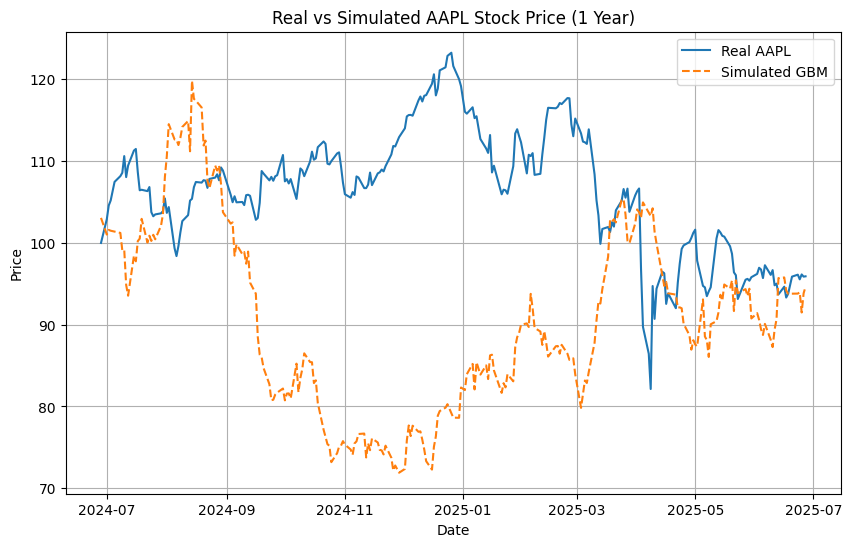

In [48]:
import yfinance as yf

# Download real stock data (e.g., Apple Inc.) for the past year
ticker = "AAPL"
data = yf.download(ticker, period="1y", interval="1d")
real_prices = data["Close"]
dates = pd.date_range(end=pd.Timestamp.today(), periods=252, freq='B')
# Align time frame and rebase to match simulation
real_prices = real_prices.dropna()
#real_prices = real_prices[-254:]  # Match number of trading days


real_prices_rebased = real_prices / real_prices.iloc[0] * S0  # Start at S0 = 100

# Simulate a single GBM path using historical mu and sigma
log_returns = np.log(real_prices / real_prices.shift(1)).dropna()
mu_real = log_returns.mean() * 250
sigma_real = log_returns.std() * np.sqrt(250)
time_grid=time_grid[:250]

mu_real=float(mu_real)
sigma_real=float(sigma_real)
Z = np.random.normal(size=N)
W = np.cumsum(np.sqrt(dt) * Z)
W=W[:250]
S_simulated = S0 * np.exp((mu_real - 0.5 * sigma_real**2) * time_grid + sigma_real * W)



# Plot real vs simulated prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices_rebased.index, real_prices_rebased.values, label="Real AAPL")
plt.plot(real_prices_rebased.index, S_simulated, label="Simulated GBM", linestyle='--')
plt.title("Real vs Simulated AAPL Stock Price (1 Year)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\manij\AppData\Local\Temp\ipykernel_1492\4079857784.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu_real=float(mu_real)
C:\Users\manij\AppData\Local\Temp\ipykernel_1492\4079857784.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma_real=float(sigma_real)


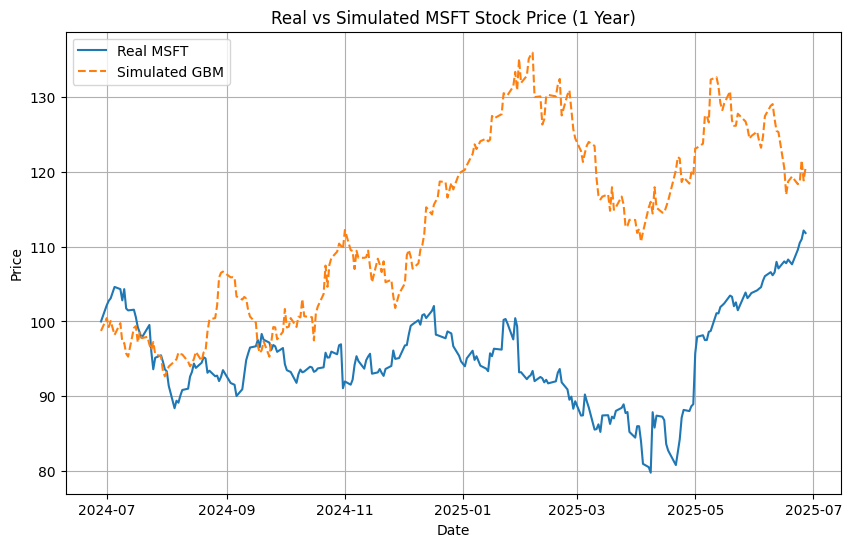

In [46]:
ticker = "MSFT"
data = yf.download(ticker, period="1y", interval="1d")
real_prices = data["Close"]
dates = pd.date_range(end=pd.Timestamp.today(), periods=252, freq='B')
# Align time frame and rebase to match simulation
real_prices = real_prices.dropna()
#real_prices = real_prices[-254:]  # Match number of trading days


real_prices_rebased = real_prices / real_prices.iloc[0] * S0  # Start at S0 = 100

# Simulate a single GBM path using historical mu and sigma
log_returns = np.log(real_prices / real_prices.shift(1)).dropna()
mu_real = log_returns.mean() * 250
sigma_real = log_returns.std() * np.sqrt(250)
time_grid=time_grid[:250]

mu_real=float(mu_real)
sigma_real=float(sigma_real)
Z = np.random.normal(size=N)
W = np.cumsum(np.sqrt(dt) * Z)
W=W[:250]
S_simulated = S0 * np.exp((mu_real - 0.5 * sigma_real**2) * time_grid + sigma_real * W)



# Plot real vs simulated prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices_rebased.index, real_prices_rebased.values, label="Real MSFT")
plt.plot(real_prices_rebased.index, S_simulated, label="Simulated GBM", linestyle='--')
plt.title("Real vs Simulated MSFT Stock Price (1 Year)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\manij\AppData\Local\Temp\ipykernel_1492\1714555926.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mu_real = float(log_returns.mean()) * 250  # annualized drift
C:\Users\manij\AppData\Local\Temp\ipykernel_1492\1714555926.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sigma_real = float(log_returns.std()) * np.sqrt(250)  # annualized volatility


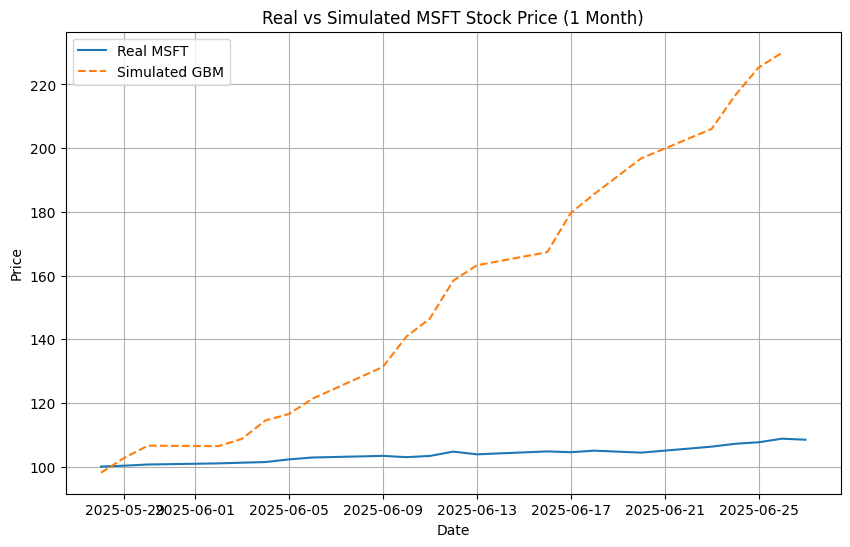

In [62]:

# Parameters
S0 = 100
N = 21  # Approx. number of trading days in 1 month
dt = 1 / N
time_grid = np.linspace(0, 1, N)

# Download 1 month of MSFT data
ticker = "MSFT"
data = yf.download(ticker, period="1mo", interval="1d")
real_prices = data["Close"].dropna()

# Generate matching date index
dates = real_prices.index

# Rebase real prices to start at S0
real_prices_rebased = real_prices / real_prices.iloc[0] * S0

# Estimate drift and volatility from log returns
log_returns = np.log(real_prices / real_prices.shift(1)).dropna()
mu_real = float(log_returns.mean()) * 250  # annualized drift
sigma_real = float(log_returns.std()) * np.sqrt(250)  # annualized volatility

# Simulate GBM path
Z = np.random.normal(size=N)
W = np.cumsum(np.sqrt(dt) * Z)
S_simulated = S0 * np.exp((mu_real - 0.5 * sigma_real**2) * time_grid + sigma_real * W)
#dates=dates[:21]
# Plot real vs simulated prices
plt.figure(figsize=(10, 6))
plt.plot(dates, real_prices_rebased.values, label="Real MSFT")
plt.plot(dates[:21], S_simulated, label="Simulated GBM", linestyle='--')
plt.title("Real vs Simulated MSFT Stock Price (1 Month)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [61]:
S_simulated.shape

(21,)

## Black Scholes Model

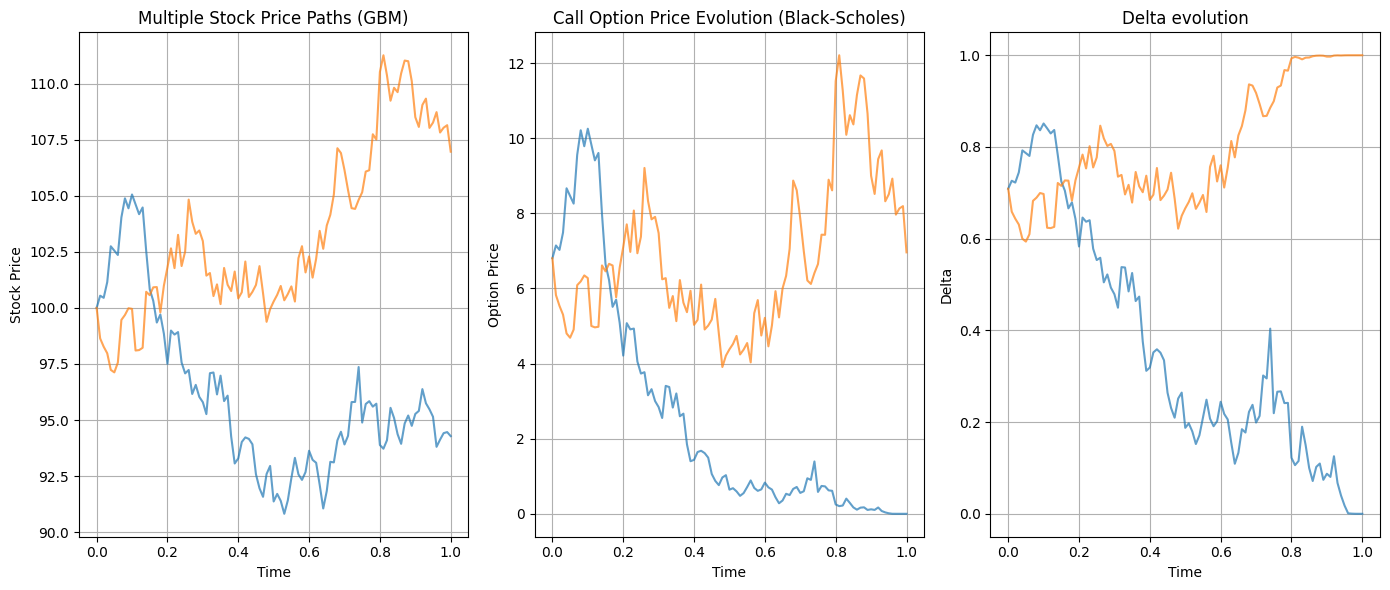

In [94]:
from scipy.stats import norm

# Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity (1 year)
r = 0.05        # Risk-free interest rate
sigma = 0.1   # Volatility
dt = 0.01       # Time step
N = int(T / dt) # Number of time steps
num_paths=2
np.random.seed(42)

all_stock_paths = []
all_option_paths = []
all_delta_paths=[]
for _ in range(num_paths):
    W = np.random.standard_normal(size=N)
    W = np.insert(W, 0, 0)
    W = np.cumsum(W) * np.sqrt(dt)
    S = S0 * np.exp((r - 0.5 * sigma**2) * time + sigma * W)
    all_stock_paths.append(S)

    call_prices = []
    delta=[]
    for i, t in enumerate(time):
        tau = T - t
        if tau <= 0:
            call_prices.append(max(S[i] - K, 0))
            delta.append(call_prices[-1]/(S[i]-K))
        else:
            d1 = (np.log(S[i] / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)
            delta.append(norm.cdf(d1))
            call_price = S[i] * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
            call_prices.append(call_price)
    all_option_paths.append(call_prices)
    all_delta_paths.append(delta)

# Plotting
plt.figure(figsize=(14, 6))

# Plot multiple stock price paths
plt.subplot(1, 3, 1)
for path in all_stock_paths:
    plt.plot(time, path, alpha=0.7)
plt.title('Multiple Stock Price Paths (GBM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.grid(True)

# Plot corresponding call option price paths
plt.subplot(1, 3, 2)
for path in all_option_paths:
    plt.plot(time, path, alpha=0.7)
plt.title('Call Option Price Evolution (Black-Scholes)')
plt.xlabel('Time')
plt.ylabel('Option Price')
plt.grid(True)

# Plot delta as a function of time
plt.subplot(1,3,3)
for delta in all_delta_paths:
    plt.plot(time, delta, alpha=0.7)
plt.title('Delta evolution')
plt.xlabel('Time')
plt.ylabel('Delta')
plt.grid(True)

plt.tight_layout()
plt.show()


## No matter what happens, whether the option ends in the money or out, if you hedge the short on the option by replicating a portfolio consisting of the underlying stock and some money invested in the money market account, you will end up holing the right amount of the stock at maturity(0 or 1)

## Next step: Study the dependence of Black scholes on its constant parameters such as $\sigma$, risk free rate $r$ and mean of the GBM $\mu$